<a href="https://colab.research.google.com/github/pythience/Integrador/blob/master/TPFinal_AUSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science 2019 - Digital House #Data
##Trabajo Integrador
![](https://www.ausa.com.ar/wp-content/themes/ausa/images/logo-ausa-negro.png)
##Seguridad Vial Autopistas Ausa 
###Introducción
####Información de hechos que requirieron atención por parte de Seguridad de Vial de AUSA.

El dataset consiste en vectores de características que pertenecen a 5700+ incidentes o hechos que requirieron atención por parte de Seguridad de Vial de AUSA. 

El conjunto de datos se conforma de manera que cada registro pertenezca a un hecho diferente. Cada hecho se registra con fecha y hora, vía dónde ocurre, condiciones climáticas y vehículos involucrados.

El conjunto de datos original consta de 1 atributo de fechas, 8 atributos numéricos y 6 atributos categóricos. El atributo 'lesionados' o 'fallecidos' se utiliza como etiqueta de clasificación.

####Descripción de las columnas:
**Fecha:** Fecha del hecho.

**Autopista:** En cuál de las autopistas que administra AUSA se produjo el hecho. (También se informan zonas importantes como el distribuidor de 9 de julio y la zona de transición entre la AU1 y las AU6).
**Localización:** Detalle que da más precisión del lugar donde se produjo el hecho dentro de la autopista.
**Punto Kilométrico:** Lugar del hecho contado desde el kilometro 0 de cada autopista.

**Tipo Evento:** Categorización del hecho:
*   **Accidente:** acontecimiento inesperado, no planeado, que implica una alteración en el estado normal de las personas, elementos o funciones, con repercusiones negativas,con potencial para causar lesiones o muerte en las personas y daños o perjuicios a bienes de los actores involucrados o de terceros.
*   **Incidente:** materialización de un riesgo en un suceso concreto de escasa o nula
repercusión dañina, que puede ocasionar una reducción temporaria de la calzada o un
incremento anormal de la demanda, que afecta la seguridad vial y que puede
desencadenar en un accidente.

**Tipo de siniestro:** son descripciones acotadas o categorizadas del hecho de tránsito.

**Tipos de Vehículos:** es la clasificación por tipología de vehículos involucrados.
*   Camiones (incluye FURGON GRANDE, GRUAS).
*   Autos (incluye: TAXI, PIC UP, CAMIONETA, FURGON CHICO).
*   Motos
*   Ómnibus (Incluye: AUTOBUS y MINIBUS).

**Clima:** Estado del Clima en el momento del hecho (seleccionado manualmente).

**Estado Pavimento:** Estado del pavimento en el momento del hecho (seleccionado
manualmente).

**Fallecidos y Heridos:** Numero de involucrados en los accidentes según su estado de gravedad.



---


###  Series de tiempo

El análisis de series de tiempo se suele utilizar para proyectar o pronosticar la evolución de una variable a lo largo del tiempo, a partir de información previa sobre esa misma variable. 

#### 1) Análisis exploratorio y preprocessing

El dataset nos provee:
*   tres columnas sobre la ubicación donde se produce el incidente. 
*   tres columnas relacionadas a la fecha del incidente. (donde detectamos una inconsistencia de origen en el formato de la fecha, y para lo cual el dataset incluye una columna adicional que permite corregirlo).
*   dos columnas sobre las condiciones ambientales al momento del incidente.
*   cinco columnas sobre el tipo de incidente y los vehículos involucrados.
*   dos columnas sobre el estado y cantidad de personas involucradas.


*Otras características:*
La función "Día especial" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la compra. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de San Valentín, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye sistema operativo, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

*Fuente: https://data.buenosaires.gob.ar/dataset/seguridad-vial-autopistas-ausa/archivo/187.2*


---



In [0]:
# para Colab, agregar ### para Anaconda
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# para Anaconda:
path = ''

# para Colab, CB:
path = 'gdrive/My Drive/DataScience - DH/Trabajo_Integrador/AUSA/BA DATA/'

In [0]:
# Importamos las librerías necesarias
# https://data.buenosaires.gob.ar/dataset/seguridad-vial-autopistas-ausa/archivo/187.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 100
pd.set_option("display.max_rows", 101)
from datetime import datetime, date, time, timedelta
import calendar

In [0]:
# Levantamos el dataset
# df = pd.read_csv("intervenciones-de-seguridad-vial.csv", encoding = 'utf-8')
df = pd.read_csv('{}intervenciones-de-seguridad-vial.csv'.format(path), dtype={'periodo':'str', 'fecha':'str'}, encoding = 'utf-8')  

df.shape

(5785, 15)

In [0]:
df.sample(5)

,periodo,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion
1478,201504,2015-04-18,15,AU 25 DE MAYO,DESCENDENTE,2500,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0
2660,201604,2016-04-27,16,AU 25 DE MAYO,DESCENDENTE,RAMPA ACCESO,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,2
1499,201504,2015-04-24,7,AU 25 DE MAYO,DESCENDENTE,1200,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,3,0,0
804,201410,2014-02-10,7,AU PERTIO MORENO,ASCENDENTE,5400,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,0,0,1
4473,201712,2017-04-12,15,AV LUGONES,DESCENDENTE,10200,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,1,1,0,0


###Se observan fechas en formato incorrecto, inconveniente de origen, y al dataset le agregaron un campo adicional para poder corregirlo.

In [0]:
print(df.periodo.unique())

['201401' '201402' '201403' '201404' '201405' '201406' '201407' '201408'
 '201409' '201410' '201411' '201412' '201501' '201502' '201503' '201504'
 '201505' '201506' '201507' '201508' '201509' '201510' '201511' '201512'
 '201601' '201602' '201603' '201604' '201605' '201606' '201607' '201608'
 '201609' '201610' '201611' '201612' '201701' '201702' '201703' '201704'
 '201705' '201706' '201707' '201708' '201709' '201710' '201711' '201712'
 '201801' '201802' '201803' '201804' '201805' '201806' '201807' '201808'
 '201809' '201810' '201811' '201812' '201901' '201902' '201903' '201904']


In [0]:
from datetime import datetime

def formatear_fecha(str_periodo, str_fecha, hora):
  periodo_mes = str_periodo[-2:]
  comps_fecha = str_fecha.split('-') #split por guión

  if (periodo_mes == comps_fecha[1]):
    return datetime(year=int(comps_fecha[0]), month=int(comps_fecha[1]), day=int(comps_fecha[2]), hour=hora)
  else:
    return datetime(year=int(comps_fecha[0]), month=int(comps_fecha[2]), day=int(comps_fecha[1]), hour=hora)
    


In [0]:
print(formatear_fecha('201802','2018-02-02',7))
print(formatear_fecha('201802','2018-02-27',7))
print(formatear_fecha('201802','2018-20-02',7))

2018-02-02 07:00:00
2018-02-27 07:00:00
2018-02-20 07:00:00


In [0]:
df['fecha_hora'] = df.apply(lambda row: formatear_fecha(row['periodo'], row['fecha'], row['hora']), axis=1)
#df['dia_semana'] = df.apply(lambda row: row['fecha_hora'].weekday(), axis=1) # days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df['dia_semana']= df['fecha_hora'].dt.day_name()

In [0]:
df.sample(5)

,periodo,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,fecha_hora,dia_semana
690,201408,2014-08-25,14,AU 25 DE MAYO,ASCENDENTE,8100,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,2014-08-25 14:00:00,Monday
3370,201612,2016-06-12,8,AU PERTIO MORENO,TRANSICION RAMAL 1,RAMPA EGRESO,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,0,0,2,2016-12-06 08:00:00,Tuesday
4786,201803,2018-03-25,6,AU 25 DE MAYO,ASCENDENTE,1500,LLUVIOSO,MOJADA/HUMEDA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0,2018-03-25 06:00:00,Sunday
1791,201507,2015-07-25,11,AU PERTIO MORENO,ASCENDENTE,5400,BUENO,OTRO,0,0,COLISION CON DOS O MAS VEHICULOS,2,0,0,0,2015-07-25 11:00:00,Saturday
4338,201710,2017-10-26,10,AV LUGONES,DESCENDENTE,7500,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,1,1,0,0,2017-10-26 10:00:00,Thursday


###Podemos transformar las columnas que intencionalmente cargamos como textos  al tipo más apropiado para transformar.

In [0]:
# reemplazamos los espacios por _ en nombres de columnas
df.columns = [x.replace(' ', '_') for x in df.columns]

In [0]:
df_cols = df.columns
print(df_cols)
df_cols_reord = ['periodo', 'fecha_hora', 'dia_semana', 'hora', 'autopista', 'banda_y_o_ramal', 'pk',
       'condiciones_meteorologicas', 'superficie_de_la_via', 'lesionados',
       'fallecidos', 'tipo_de_siniestro', 'moto', 'liviano', 'bus', 'camion', 'fecha']
#df.reindex(columns=df_cols_reord)
df = df[df_cols_reord]
df.sample(5)

Index(['periodo', 'fecha', 'hora', 'autopista', 'banda_y_o_ramal', 'pk',
       'condiciones_meteorologicas', 'superficie_de_la_via', 'lesionados',
       'fallecidos', 'tipo_de_siniestro', 'moto', 'liviano', 'bus', 'camion',
       'fecha_hora', 'dia_semana'],
      dtype='object')


,periodo,fecha_hora,dia_semana,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,fecha
1098,201412,2014-12-17 12:00:00,Wednesday,12,AU 25 DE MAYO,ASCENDENTE,5600,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,1,1,0,0,2014-12-17
192,201403,2014-03-16 23:00:00,Sunday,23,AU PERTIO MORENO,ASCENDENTE,5400,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,1,0,0,2014-03-16
5670,201903,2019-03-17 09:00:00,Sunday,9,AU DELLEPIANE,DESCENDENTE,1000,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,2019-03-17
4009,201707,2017-07-16 14:00:00,Sunday,14,AU ILLIA,DESCENDENTE,2600,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,2017-07-16
1798,201507,2015-07-28 15:00:00,Tuesday,15,AU DELLEPIANE,DESCENDENTE,2800,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0,2015-07-28


In [0]:
periodo_types = df.periodo.unique()
df.periodo = pd.Categorical(df.periodo, categories=periodo_types, ordered=True)
print(df.periodo.cat.categories)

Index(['201401', '201402', '201403', '201404', '201405', '201406', '201407',
       '201408', '201409', '201410', '201411', '201412', '201501', '201502',
       '201503', '201504', '201505', '201506', '201507', '201508', '201509',
       '201510', '201511', '201512', '201601', '201602', '201603', '201604',
       '201605', '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201701', '201702', '201703', '201704', '201705', '201706',
       '201707', '201708', '201709', '201710', '201711', '201712', '201801',
       '201802', '201803', '201804', '201805', '201806', '201807', '201808',
       '201809', '201810', '201811', '201812', '201901', '201902', '201903',
       '201904'],
      dtype='object')


In [0]:
dia_semana_types = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
print(dia_semana_types)
df.dia_semana = pd.Categorical(df.dia_semana, categories=dia_semana_types, ordered=True)
print(df.dia_semana.cat.categories)

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object')


In [0]:
df.hora = pd.Categorical(df.hora, ordered=True)
print(df.hora.cat.categories)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')


In [0]:
print (df.dtypes)


periodo                             category
fecha_hora                    datetime64[ns]
dia_semana                          category
hora                                category
autopista                             object
banda_y_o_ramal                       object
pk                                    object
condiciones_meteorologicas            object
superficie_de_la_via                  object
lesionados                             int64
fallecidos                             int64
tipo_de_siniestro                     object
moto                                   int64
liviano                                int64
bus                                    int64
camion                                 int64
fecha                                 object
dtype: object


In [0]:
# Chequeamos nulos y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 17 columns):
periodo                       5785 non-null category
fecha_hora                    5785 non-null datetime64[ns]
dia_semana                    5785 non-null category
hora                          5785 non-null category
autopista                     5785 non-null object
banda_y_o_ramal               5785 non-null object
pk                            5785 non-null object
condiciones_meteorologicas    5785 non-null object
superficie_de_la_via          5785 non-null object
lesionados                    5785 non-null int64
fallecidos                    5785 non-null int64
tipo_de_siniestro             5785 non-null object
moto                          5785 non-null int64
liviano                       5785 non-null int64
bus                           5785 non-null int64
camion                        5785 non-null int64
fecha                         5785 non-null object
dtypes: category(3

In [0]:
df.describe()

,lesionados,fallecidos,moto,liviano,bus,camion
count,5785.000000,5785.000000,5785.000000,5785.00000,5785.000000,5785.000000
mean,0.616768,0.008124,0.378047,1.21331,0.038029,0.146932
std,0.977918,0.091682,0.530242,0.99156,0.202693,0.410172
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,2.00000,0.000000,0.000000
max,17.000000,2.000000,3.000000,9.00000,2.000000,3.000000


###Corregimos algunas textos duplicados dentro de las columnas
####y procesamos textos para poder operar con dummies

In [0]:
print(len(df.autopista.unique()),df.autopista.unique())
print(len(df.banda_y_o_ramal.unique()),df.banda_y_o_ramal.unique())
print(len(df.condiciones_meteorologicas.unique()),df.condiciones_meteorologicas.unique())
print(len(df.superficie_de_la_via.unique()),df.superficie_de_la_via.unique())
print(len(df.tipo_de_siniestro.unique()),df.tipo_de_siniestro.unique())


17 ['AU CAMPORA' 'AU DELLEPIANE' 'AU 25 DE MAYO' 'AU PERTIO MORENO'
 'AV LUGONES' 'AV CANTILO' 'AU FRONDIZI' 'AU ILLIA' 'AV. LUGONES'
 'AU PERITO MORENO' 'DIST. 9 DE JULIO' 'AV. CANTILO' 'TRANSICION RAMAL 2'
 'DIST. UDAONDO' 'TRANSICION RAMAL 3' 'PTE. SCALABRINI ORTIZ'
 'TRANSICION RAMAL 1']
25 ['ASCENDENTE' 'DESCENDENTE' 'TRANSICION RAMAL 2' 'TRANSICION RAMAL 4'
 'TRANSICION RAMAL 3' 'DISTRIBUIDOR 9 DE JULIO' 'PUENTE SCALABRINI ORTIZ'
 'DISTRIBUIDOR UDAONDO' 'TRANSICION RAMAL 1' 'DISTRIBUIDOR DELLEPIANE'
 'CARRIL METROBUS' 'PUENTE ANGEL LABRUNA' 'RAMAL 1 BIS' 'RAMAL 2 BIS'
 'RAMAL 6' 'RAMAL DE ENLACE' ' ' 'RAMAL 4' 'RAMAL DE ENLACE (AU1/AU6)'
 'RAMAL 3/4' 'RAMAL 8' 'RAMAL DE EGRESO' 'RAMAL 1' 'RAMAL 3'
 'PTE. LABRUBNA']
5 ['BUENO' 'LLUVIOSO' 'VIENTOS FUERTES' 'NIEBLA, BRUMA O HUMO' 'NIEBLA']
4 ['SECA' 'MOJADA/HUMEDA' 'OTRO' 'INUNDADA']
7 ['COLISION CON OBSTACULO FIJO' 'COLISION CON DOS O MAS VEHICULOS'
 'OBSTACULO NO FIJO' 'SINIESTRO DE UN SOLO VEHICULO / SIN COLISION'
 'OTRO TIPO DE 

#### Debemos hacer un seguimiento para las variables dummies

In [0]:

# En esta lista estan las categorías por las que más adelante se generan las dummies segun el indice
df.autopista = df.autopista.apply(lambda x: x.replace('PERTIO','PERITO').replace('.', '').replace(' ', '_').replace("'", '').replace('/', '_'))
df.banda_y_o_ramal = df.banda_y_o_ramal.apply(lambda x: x.replace('PTE. LABRUBNA','PUENTE ANGEL LABRUNA').replace('.', '').replace(' ', '_').replace("'", '').replace('/', '_'))
df.condiciones_meteorologicas = df.condiciones_meteorologicas.apply(lambda x: x.replace('.', '').replace(',', '').replace(' ', '_').replace("'", '').replace('/', '_'))
df.superficie_de_la_via = df.superficie_de_la_via.apply(lambda x: x.replace('.', '').replace(' ', '_').replace("'", '').replace('/', '_'))
df.tipo_de_siniestro = df.tipo_de_siniestro.apply(lambda x: x.replace('.', '').replace(' ', '_').replace("'", '').replace('/', '_'))


In [0]:
print(len(df.autopista.unique()),df.autopista.unique())
print(len(df.banda_y_o_ramal.unique()),df.banda_y_o_ramal.unique())
print(len(df.condiciones_meteorologicas.unique()),df.condiciones_meteorologicas.unique())
print(len(df.superficie_de_la_via.unique()),df.superficie_de_la_via.unique())
print(len(df.tipo_de_siniestro.unique()),df.tipo_de_siniestro.unique())


14 ['AU_CAMPORA' 'AU_DELLEPIANE' 'AU_25_DE_MAYO' 'AU_PERITO_MORENO'
 'AV_LUGONES' 'AV_CANTILO' 'AU_FRONDIZI' 'AU_ILLIA' 'DIST_9_DE_JULIO'
 'TRANSICION_RAMAL_2' 'DIST_UDAONDO' 'TRANSICION_RAMAL_3'
 'PTE_SCALABRINI_ORTIZ' 'TRANSICION_RAMAL_1']
24 ['ASCENDENTE' 'DESCENDENTE' 'TRANSICION_RAMAL_2' 'TRANSICION_RAMAL_4'
 'TRANSICION_RAMAL_3' 'DISTRIBUIDOR_9_DE_JULIO' 'PUENTE_SCALABRINI_ORTIZ'
 'DISTRIBUIDOR_UDAONDO' 'TRANSICION_RAMAL_1' 'DISTRIBUIDOR_DELLEPIANE'
 'CARRIL_METROBUS' 'PUENTE_ANGEL_LABRUNA' 'RAMAL_1_BIS' 'RAMAL_2_BIS'
 'RAMAL_6' 'RAMAL_DE_ENLACE' '_' 'RAMAL_4' 'RAMAL_DE_ENLACE_(AU1_AU6)'
 'RAMAL_3_4' 'RAMAL_8' 'RAMAL_DE_EGRESO' 'RAMAL_1' 'RAMAL_3']
5 ['BUENO' 'LLUVIOSO' 'VIENTOS_FUERTES' 'NIEBLA_BRUMA_O_HUMO' 'NIEBLA']
4 ['SECA' 'MOJADA_HUMEDA' 'OTRO' 'INUNDADA']
7 ['COLISION_CON_OBSTACULO_FIJO' 'COLISION_CON_DOS_O_MAS_VEHICULOS'
 'OBSTACULO_NO_FIJO' 'SINIESTRO_DE_UN_SOLO_VEHICULO___SIN_COLISION'
 'OTRO_TIPO_DE_SINIESTRO' 'OTRO' 'CON_DOS_O_MAS_VEHICULOS-IMPACTO_TRASERO']


###Guardamos el dataset transformado

In [0]:
import pickle

In [0]:
with open('{}intervenciones-de-seguridad-vial.pkl'.format(path), 'wb') as df_pkl:
    pickle.dump(df, df_pkl)

In [0]:
# el graficador altair no soporta más de 2000 rows por eso lo filtramos para reducir filas.
df_alt = df[df['periodo']>'201712']
df_alt.shape

(1206, 17)

In [0]:
import altair as alt

alt.AutosizeType('fit')
alt.AutoSizeParams()
# assume df contains the DataFrame from the question + a numeric column
alt.Chart(df_alt).mark_point(size=10).encode(y='lesionados', x="autopista", size='superficie_de_la_via', color='dia_semana').properties(width=750)

Chart({
  data:      periodo          fecha_hora dia_semana  ... bus camion       fecha
  4579  201801 2018-01-01 04:00:00     Monday  ...   0      0  2018-01-01
  4580  201801 2018-01-01 07:00:00     Monday  ...   0      0  2018-01-01
  4581  201801 2018-01-03 10:00:00  Wednesday  ...   0      0  2018-03-01
  4582  201801 2018-01-04 12:00:00   Thursday  ...   0      0  2018-04-01
  4583  201801 2018-01-05 10:00:00     Friday  ...   0      1  2018-05-01
  4584  201801 2018-01-05 17:00:00     Friday  ...   0      0  2018-05-01
  4585  201801 2018-01-05 18:00:00     Friday  ...   0      0  2018-05-01
  4586  201801 2018-01-06 09:00:00   Saturday  ...   0      1  2018-06-01
  4587  201801 2018-01-06 12:00:00   Saturday  ...   0      0  2018-06-01
  4588  201801 2018-01-07 06:00:00     Sunday  ...   0      0  2018-07-01
  4589  201801 2018-01-07 16:00:00     Sunday  ...   2      0  2018-07-01
  4590  201801 2018-01-07 18:00:00     Sunday  ...   0      0  2018-07-01
  4591  201801 2018-01-08 09:00:00     Monday  ...   0      1  2018-08-01
  4592  201801 2018-01-08 16:00:00     Monday  ...   0      0  2018-08-01
  4593  201801 2018-01-09 08:00:00    Tuesday  ...   0      0  2018-09-01
  4594  201801 2018-01-09 10:00:00    Tuesday  ...   0      0  2018-09-01
  4595  201801 2018-01-09 11:00:00    Tuesday  ...   0      0  2018-09-01
  4596  201801 2018-01-09 15:00:00    Tuesday  ...   0      0  2018-09-01
  4597  201801 2018-01-09 16:00:00    Tuesday  ...   0      1  2018-09-01
  4598  201801 2018-01-10 06:00:00  Wednesday  ...   0      0  2018-10-01
  4599  201801 2018-01-10 10:00:00  Wednesday  ...   0      0  2018-10-01
  4600  201801 2018-01-10 15:00:00  Wednesday  ...   0      0  2018-10-01
  4601  201801 2018-01-10 17:00:00  Wednesday  ...   0      0  2018-10-01
  4602  201801 2018-01-11 01:00:00   Thursday  ...   0      0  2018-11-01
  4603  201801 2018-01-11 08:00:00   Thursday  ...   0      0  2018-11-01
  4604  201801 2018-01-11 12:00:00   Thursday  ...   0      0  2018-11-01
  4605  201801 2018-01-11 14:00:00   Thursday  ...   0      0  2018-11-01
  4606  201801 2018-01-11 15:00:00   Thursday  ...   0      0  2018-11-01
  4607  201801 2018-01-11 15:00:00   Thursday  ...   0      0  2018-11-01
  4608  201801 2018-01-11 17:00:00   Thursday  ...   0      1  2018-11-01
  4609  201801 2018-01-12 08:00:00     Friday  ...   0      2  2018-12-01
  4610  201801 2018-01-12 09:00:00     Friday  ...   0      0  2018-12-01
  4611  201801 2018-01-12 10:00:00     Friday  ...   0      0  2018-12-01
  4612  201801 2018-01-12 13:00:00     Friday  ...   0      1  2018-12-01
  4613  201801 2018-01-14 15:00:00     Sunday  ...   0      0  2018-01-14
  4614  201801 2018-01-16 23:00:00    Tuesday  ...   0      0  2018-01-16
  4615  201801 2018-01-17 09:00:00  Wednesday  ...   0      0  2018-01-17
  4616  201801 2018-01-17 12:00:00  Wednesday  ...   0      0  2018-01-17
  4617  201801 2018-01-18 13:00:00   Thursday  ...   0      0  2018-01-18
  4618  201801 2018-01-18 23:00:00   Thursday  ...   0      1  2018-01-18
  4619  201801 2018-01-19 11:00:00     Friday  ...   0      0  2018-01-19
  4620  201801 2018-01-19 14:00:00     Friday  ...   0      2  2018-01-19
  4621  201801 2018-01-19 16:00:00     Friday  ...   0      0  2018-01-19
  4622  201801 2018-01-20 01:00:00   Saturday  ...   0      0  2018-01-20
  4623  201801 2018-01-21 23:00:00     Sunday  ...   0      0  2018-01-21
  4624  201801 2018-01-22 07:00:00     Monday  ...   0      0  2018-01-22
  4625  201801 2018-01-22 08:00:00     Monday  ...   0      3  2018-01-22
  4626  201801 2018-01-22 08:00:00     Monday  ...   0      0  2018-01-22
  4627  201801 2018-01-22 13:00:00     Monday  ...   0      0  2018-01-22
  4628  201801 2018-01-22 17:00:00     Monday  ...   1      0  2018-01-22
  ...      ...                 ...        ...  ...  ..    ...         ...
  5735  201904 2019-04-11 08:00:00   Thursday  ...   0      0  2019-04-11
  5736  201904 2019-04-11 09:00:00   Thursday  ...   0      0  2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6149d41828>,
      dtype=object)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


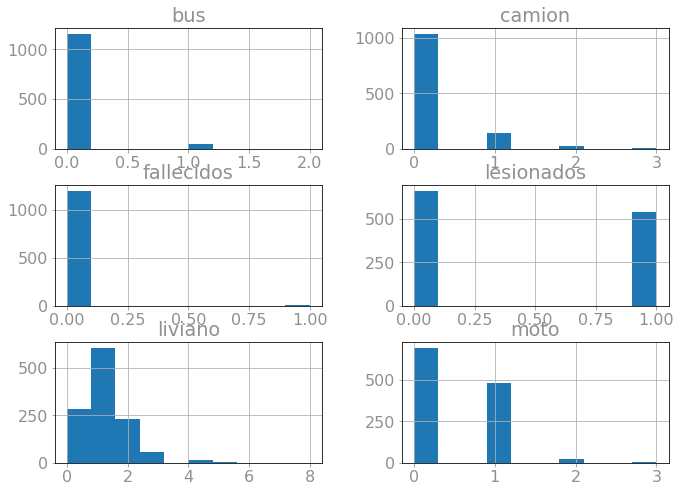

In [0]:
df_alt.hist(figsize=(11,8))

## Transformamos nuestras columnas de target para 

In [0]:
# Transformamos la columna de cantidad de lesionados a si hubo lesionados (1) o no (0)
df.fallecidos = df.fallecidos.map(lambda x : 1 if x > 0 else 0)
df.lesionados = df.lesionados.map(lambda x : 1 if x > 0 else 0)
df.sample(5)

,periodo,fecha_hora,dia_semana,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,fecha
1872,201508,2015-08-21 12:00:00,Friday,12,AU_25_DE_MAYO,DESCENDENTE,6600,BUENO,SECA,1,0,COLISION_CON_DOS_O_MAS_VEHICULOS,0,5,0,1,2015-08-21
2663,201604,2016-04-28 08:00:00,Thursday,8,AU_DELLEPIANE,ASCENDENTE,3300,BUENO,SECA,0,0,COLISION_CON_DOS_O_MAS_VEHICULOS,0,1,0,0,2016-04-28
1584,201505,2015-05-14 18:00:00,Thursday,18,AU_ILLIA,DESCENDENTE,4000,BUENO,SECA,1,0,COLISION_CON_DOS_O_MAS_VEHICULOS,0,2,0,0,2015-05-14
2851,201607,2016-07-02 17:00:00,Saturday,17,AU_25_DE_MAYO,ASCENDENTE,0,LLUVIOSO,MOJADA_HUMEDA,0,0,COLISION_CON_DOS_O_MAS_VEHICULOS,0,2,0,0,2016-02-07
668,201408,2014-08-14 19:00:00,Thursday,19,AU_DELLEPIANE,DESCENDENTE,3000,BUENO,SECA,1,0,COLISION_CON_DOS_O_MAS_VEHICULOS,0,2,0,0,2014-08-14


In [0]:
df.lesionados.unique()

array([1, 0])

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


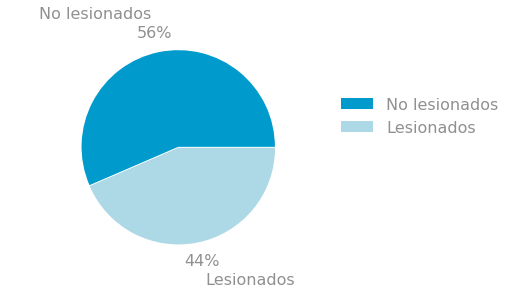

In [0]:
# Vemos los lesionados
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
lesionados = [df.loc[df['lesionados'] == 0].count()['lesionados'], df.loc[df['lesionados'] > 0].sum()['lesionados']]

fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=16
labels = ['No lesionados', 
        'Lesionados']
explode=(0.01,0)
ax.pie(lesionados, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
#ax.set_title("Lesionados en 5785 accidentes")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [0]:
features_a_encodear = ['periodo', 'dia_semana', 'hora', 'autopista', \
                       'banda_y_o_ramal', 'pk','condiciones_meteorologicas', \
                       'superficie_de_la_via', 'tipo_de_siniestro']

In [0]:
df_pairplot = df.copy(deep=True)

In [0]:
df_pairplot.autopista = pd.Categorical(df_pairplot.autopista, ordered=False)
df_pairplot.banda_y_o_ramal = pd.Categorical(df_pairplot.banda_y_o_ramal, ordered=False)
df_pairplot.condiciones_meteorologicas = pd.Categorical(df_pairplot.condiciones_meteorologicas, ordered=False)
df_pairplot.superficie_de_la_via = pd.Categorical(df_pairplot.superficie_de_la_via, ordered=False)
df_pairplot.tipo_de_siniestro = pd.Categorical(df_pairplot.tipo_de_siniestro, ordered=False)
df_pairplot.pk = pd.Categorical(df_pairplot.pk, ordered=False)


In [0]:
# Paso columnas categóricas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0, 8):
  df_pairplot[features_a_encodear[i]] = le.fit_transform(df_pairplot[features_a_encodear[i]])
df_pairplot.shape

(5785, 17)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


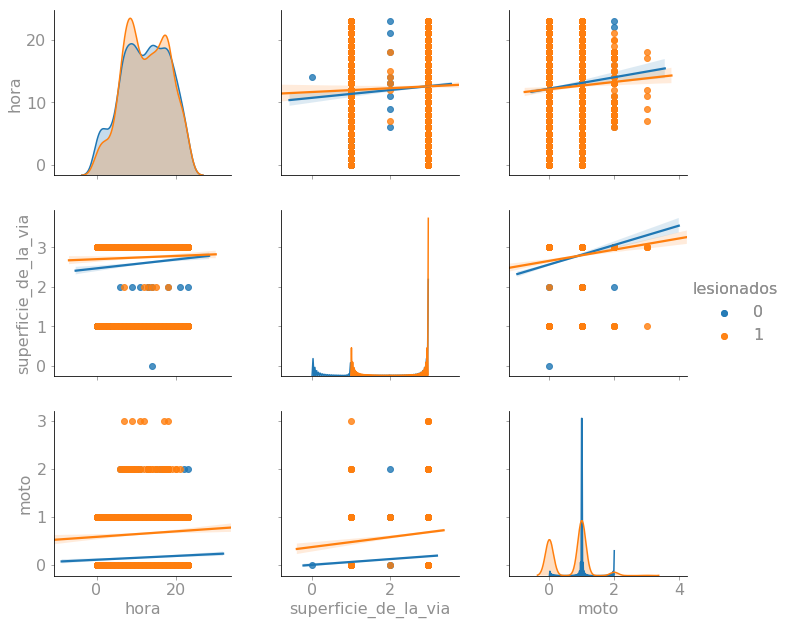

In [0]:
g = sns.pairplot(df_pairplot,hue='lesionados',size=3,vars=["hora", "superficie_de_la_via", "moto"],kind='reg')
g.add_legend();
#g.plot()
g.savefig("{}features_pairplot.png".format(path), dpi=400)

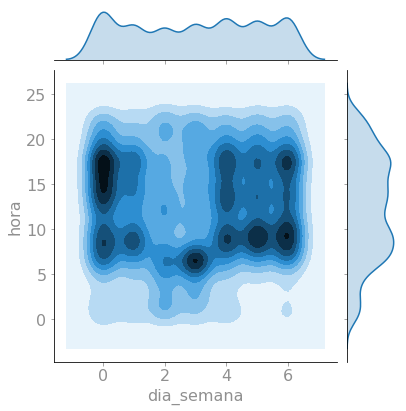

In [0]:

sns.jointplot(data=df_pairplot, x='dia_semana', y='hora', kind='kde')

[]

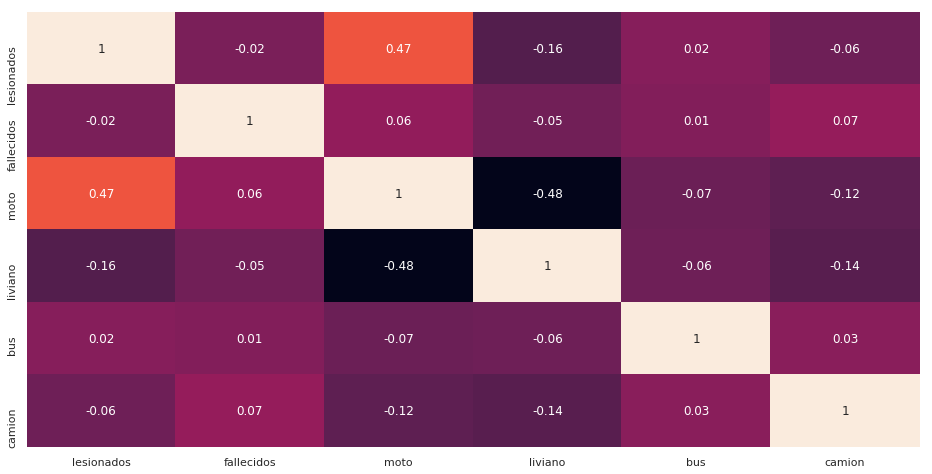

In [0]:
# Relación entre features
sns.set(rc={'figure.figsize':(16,8)})
# Usamos todas las features para un heatmap
sns_hm=sns.heatmap(df.corr().round(2),annot=True, cbar=False)
sns_hm.plot()
#fig.savefig("features_heatmap.png".format(), dpi=400)

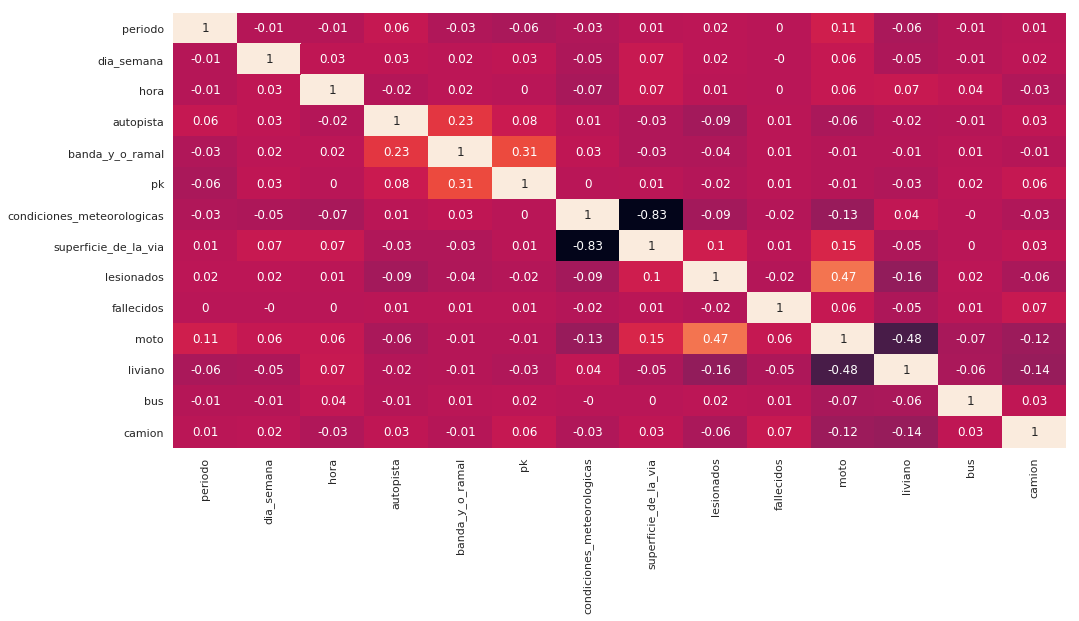

In [0]:
# Relación entre features
sns.set(rc={'figure.figsize':(16,8)})
# Usamos todas las features para un heatmap
sns_hm=sns.heatmap(df_pairplot.corr().round(2),annot=True, cbar=False)
sns_hm.plot()
fig.savefig("{}features_heatmap.png".format(path), dpi=400)

In [0]:
# Revisamos los lesionados por autopista
#df2=df[['autopista','lesionados']].groupby(['autopista']).aggregate([np.sum])
df2=df[['autopista','lesionados']].groupby(['autopista']).sum().sort_values('lesionados', ascending=False)
df2

,lesionados
autopista,
AU_25_DE_MAYO,888
AU_PERITO_MORENO,450
AU_DELLEPIANE,387
AU_FRONDIZI,295
AV_LUGONES,212
AU_ILLIA,128
AV_CANTILO,119
AU_CAMPORA,26
DIST_9_DE_JULIO,8


In [0]:
# Chequeamos totales
total_ori=np.sum(df.lesionados)
total=np.sum(df2.lesionados)
print("Total lesionados datos originales: %d" % total_ori)
print("Total lesionados por autopista: %d" % total)

Total lesionados datos originales: 2517
Total lesionados por autopista: 2517


In [0]:
# Revisamos los lesionados por periodo
df3=df[['periodo','lesionados']].groupby(['periodo']).sum().sort_values('lesionados', ascending=False)
df3

,lesionados
periodo,
201412,65
201712,61
201612,56
201510,55
201503,52
201608,51
201805,50
201610,49
201512,49


In [0]:
# Revisamos los lesionados por día de la semana
df4=df[['dia_semana','lesionados']].groupby(['dia_semana']).sum().sort_values('lesionados', ascending=False)
df4

,lesionados
dia_semana,
Friday,455
Wednesday,426
Thursday,399
Tuesday,367
Monday,345
Sunday,284
Saturday,241


In [0]:
# Revisamos los lesionados por hora
display(df[['hora', 'lesionados']].groupby(['hora']).sum().sort_values('lesionados', ascending=False))


,lesionados
hora,
9,198
18,178
17,173
8,172
7,170
10,138
13,137
15,136
14,127


In [0]:
# Revisamos los lesionados por día y hora
df5=df[['dia_semana', 'hora', 'lesionados']].groupby(['dia_semana', 'hora']).sum().sort_values('lesionados', ascending=False)
df5

lesionados
dia_semana hora            
Friday     17            41
Thursday   9             41
Wednesday  18            40
           8             38
Friday     18            38
Tuesday    9             36
Wednesday  9             36
Thursday   17            35
Tuesday    10            34
Friday     9             34
           15            34
Tuesday    8             33
Monday     9             33
Friday     8             32
Wednesday  7             32
           17            31
Monday     18            31
Sunday     6             30
Wednesday  10            30
Friday     7             29
Sunday     7             29
Thursday   14            28
           8             28
           13            28
           18            27
Friday     13            27
Wednesday  11            26
Tuesday    7             25
           17            25
Wednesday  13            24
Thursday   16            24
Tuesday    13            24
Monday     17            24
Thursday   19            23
Tuesday    14            23
Wednesday  15            23
Thursday   7             23
Saturday   6             23
Monday     7             23
Thursday   10            22
Friday     19            22
           16            22
Monday     10            22
Friday     12            22
Monday     8             22
           14            21
Friday     14            21
           11            21
Monday     12            21
Wednesday  14            21
...                     ...
Monday     2              8
Thursday   21             8
Saturday   2              8
Sunday     9              8
           4              8
Monday     23             8
Tuesday    6              8
Saturday   3              7
Monday     5              7
Sunday     10             7
Friday     5              7
Sunday     14             7
Wednesday  23             7
Monday     21             7
Sunday     17             7
           12             7
Friday     23             6
           4              6
           1              6
Saturday   14             6
Tuesday    5              6
Thursday   0              5
Saturday   10             5
Tuesday    23             5
Monday     1              5
Tuesday    4              5
Saturday   18             5
Friday     2              5
Wednesday  3              4
Thursday   23             4
Tuesday    2              4
           1              4
Saturday   20             4
Monday     22             4
Friday     0              4
Monday     4              4
Thursday   2              4
Wednesday  0              3
Thursday   4              3
Wednesday  4              3
Thursday   1              3
Sunday     1              3
Wednesday  2              2
           1              2
Friday     3              2
Tuesday    0              2
Thursday   3              2
Monday     3              2
           0              1
Tuesday    3              0

[168 rows x 1 columns]

In [0]:
# Armo matriz de features y el target
X = df.drop(['lesionados', 'fallecidos', 'fecha'], axis = 1)
y = df['lesionados']

In [0]:
features_a_encodear = ['periodo', 'dia_semana', 'hora', 'autopista', \
                       'banda_y_o_ramal', 'pk','condiciones_meteorologicas', \
                       'superficie_de_la_via', 'tipo_de_siniestro']

In [0]:
# Preprocesamos las columnas categóricas
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
# esta celda se debe ejecutar por única vez, si se intenta volver a ejecutar produce error.
X = OHE.fit_transform(X[features_a_encodear])
X.shape

(5785, 312)

In [0]:
# Divido los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
!pip install xgboost
!pip install scikit-plot
# XGBoost
import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
from scikitplot.metrics import plot_roc

In [0]:
model = XGBClassifier(nthreads=-1)
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}
xgb = RandomizedSearchCV(model,params, n_iter=25, verbose= True)
start = time.time()
xgb.fit(X_train,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
La búsqueda con XGBoost llevó:  7.820701837539673  segundos


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    7.7s finished


In [0]:
opt_xgb = xgb.best_estimator_
type(opt_xgb)

xgboost.sklearn.XGBClassifier

In [0]:
y_predicted_xgb = opt_xgb.predict_proba(X_test)
y_predict = opt_xgb.predict(X_test)
y_predicted_xgb[:,0].shape

(1910,)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1084
           1       0.63      0.32      0.43       826

    accuracy                           0.63      1910
   macro avg       0.63      0.59      0.57      1910
weighted avg       0.63      0.63      0.59      1910



In [0]:
xgb_auc = roc_auc_score(y_test,y_predict)
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.5899837388204391


0.6261780104712041


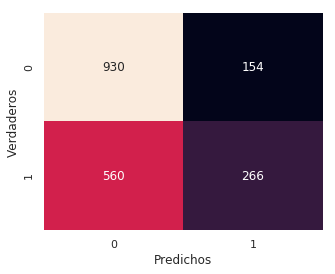

In [0]:
# Matriz de confusión
sns.set(rc={'figure.figsize':(5,4)})
sns.heatmap(confusion_matrix(y_test, y_predict), fmt="d", annot=True, cbar=False)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
print(accuracy_score(y_test, y_predict))

In [0]:
confusion = confusion_matrix(y_test, y_predict)
print(confusion)

[[930 154]
 [560 266]]


XGBoost (área = 0.59)


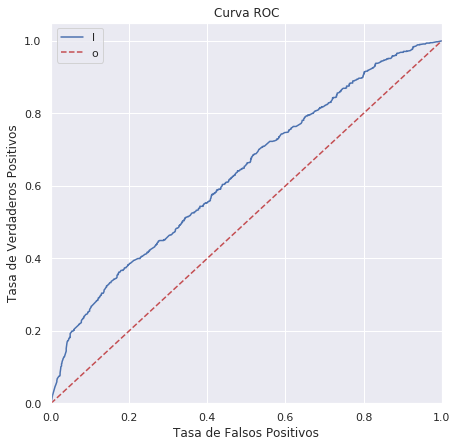

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#plot_roc(y_test,y_predict, plot_micro = False, plot_macro= False)

logit_roc_auc = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, opt_xgb.predict_proba(X_test)[:,1])

print('XGBoost (área = %0.2f)' % logit_roc_auc)

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label='XGBoost (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend("lower right")
plt.savefig('Log_ROC')
plt.show()



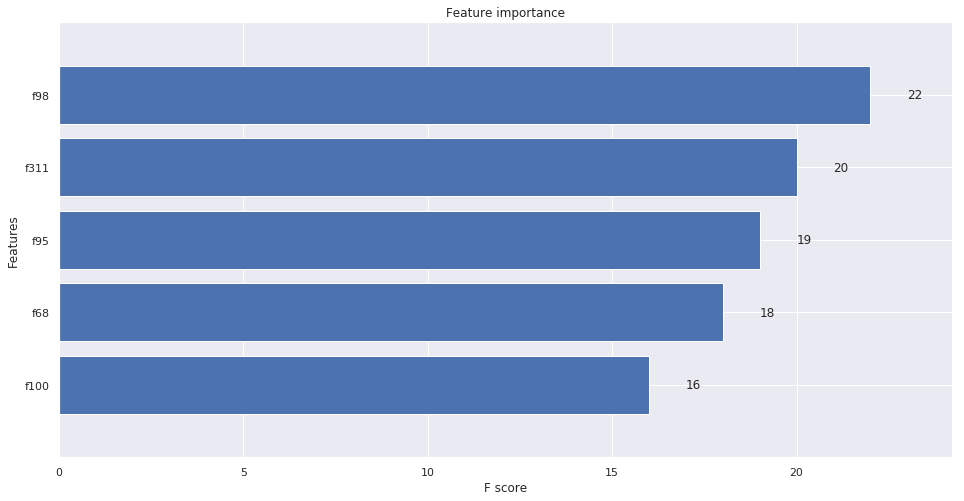

In [0]:
from xgboost import plot_importance
plot_importance(opt_xgb,  height = 0.8,max_num_features=5)

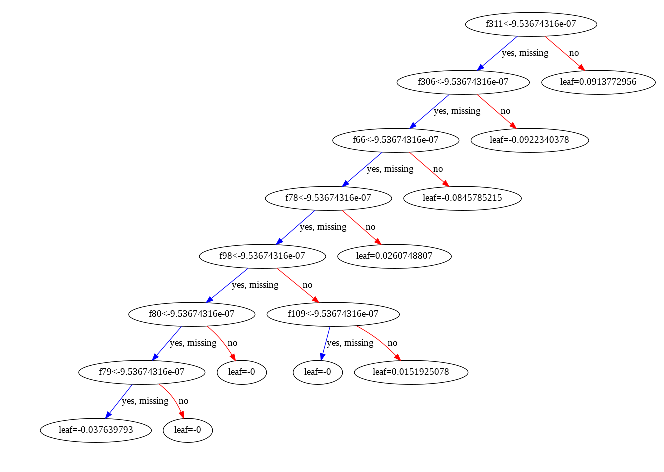

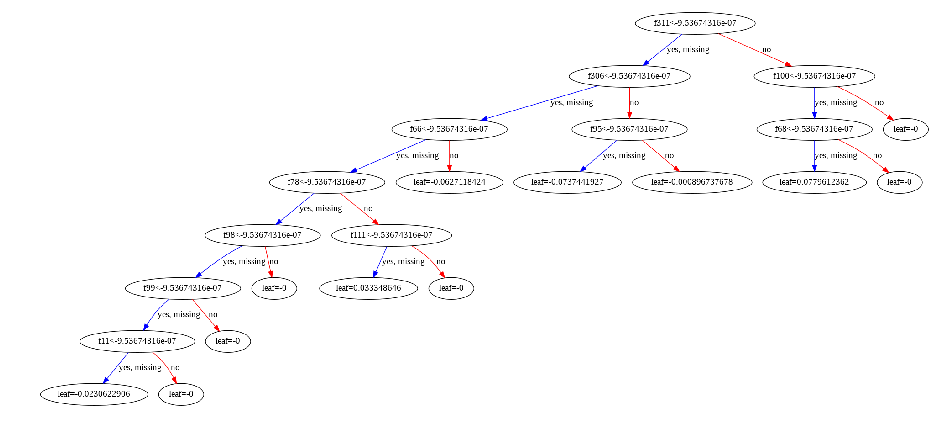

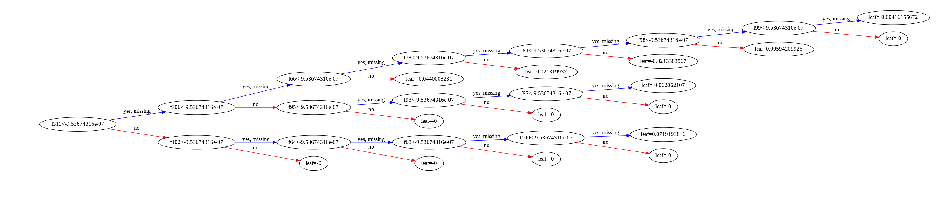

In [0]:
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# https://stackoverflow.com/questions/48736428/windows-10-anaconda-graphviz-error-not-working
from xgboost import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgboost

# Plot the first tree
xgboost.plot_tree(opt_xgb,num_trees=0)
plt.show()
# Plot the fifth tree
xgboost.plot_tree(opt_xgb,num_trees=4)
plt.show()
# Plot the last tree sideways
xgboost.plot_tree(opt_xgb,num_trees=9, rankdir='LR')
plt.show()